# Árboles de decisión

Docente: Gabriela Espinoza Picado

Los árboles de decisión nos permiten también hacer clasificaciones. En este ejercicio, trataremos de predecir las especies de los peces y graficaremos nuestro árbol de decisión.

Ejemplo



Los árboles de decisión son algoritmos que pueden ser usados tanto para clasificación como para regresión. Consisiten en una secuencia de preguntas si/sinó (if/else) que llevan a la decisión final.

Suponga que se desea clasificar, con la menor cantidad de preguntas posibles, los siguientes cuatro animales: Águila (Hawk), Pingüino (Penguin), Delfín (Dolphin) y Oso (Bear). Tan solo haciendo tres preguntas, en dos niveles, es posible identificar a que animal corresponde. Observe el siguiente diagrama.

<p><img alt="Colaboratory logo" height="300px" src="https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s10/desTreeAnimals.png" align="center" hspace="10px" vspace="0px"></p>




Empezamos como siempre cargando nuestras librerías y data sets.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [4]:
path=("/Fish.csv")
df = pd.read_csv(path)
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


# Análisis de Datos

En este análisis, queremos entender la distribución de nuestros peces. Podemos empezar aplicando un gŕafico de barras para este propósito.

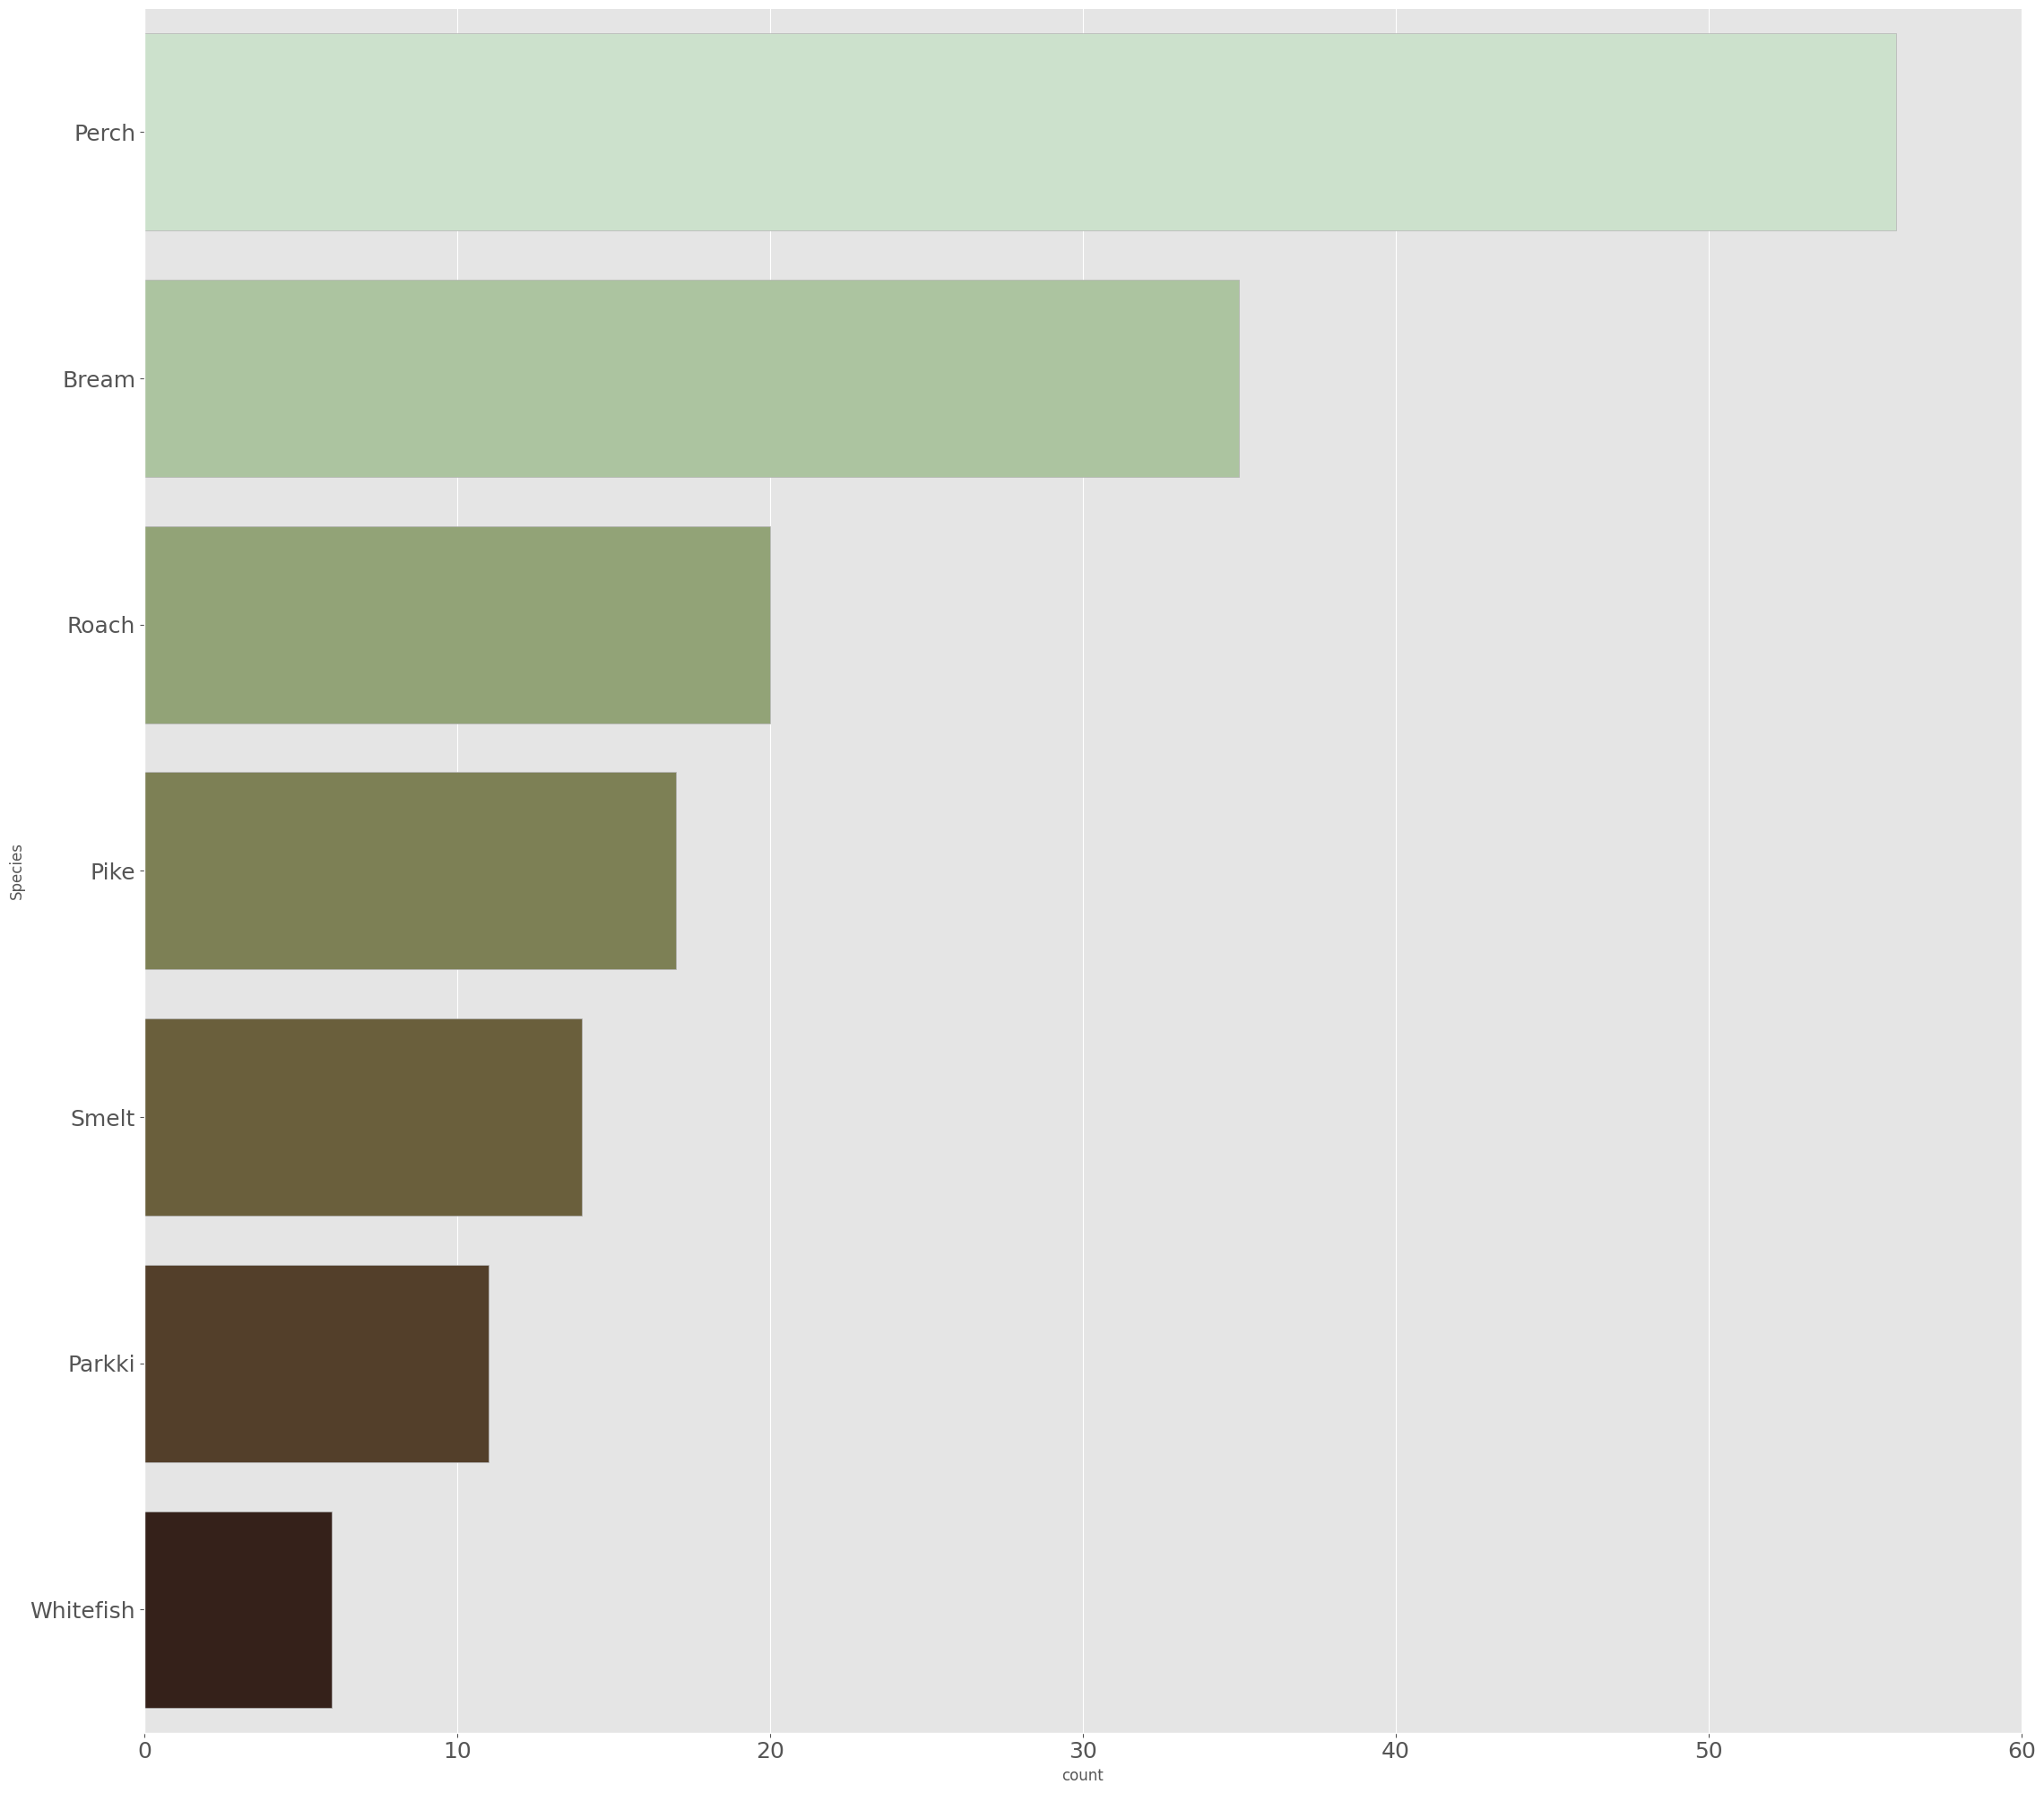

In [7]:
# Contamos las ocurrencias de cada categoría en 'Species' y ordenamos
species_count = df['Species'].value_counts().sort_values(ascending=False)

# Crear el gráfico, especificando el orden
g = sns.catplot(y="Species", kind="count", height=20, aspect=20/18,
                palette="ch:.9", edgecolor=".7",
                order=species_count.index,  # Aquí especificamos el orden
                data=df)

# Ajustar el tamaño de la fuente de los ejes
g.set_axis_labels(fontsize=18)  # Ajusta el tamaño de la fuente de las etiquetas de los ejes
g.set_xticklabels(fontsize=18)  # Ajusta el tamaño de la fuente de las marcas del eje x
g.set_yticklabels(fontsize=18)  # Ajusta el tamaño de la fuente de las marcas del eje y

# Mostrar el gráfico
plt.show()

Algo que podemos ver es que la especie Perch esta sobre representada en nuestro data set. Esto puede afectar nuestro modelo a la hora de entrenar, ya que no tenemos un data set balanceado. **Existen muchos datos para describir una clase, pero no tantos para describir otros.**

# Entrenamiento de Modelo

Para este caso en especial, usaremos todas las variables para entrenar nuestra variable. Por ende, la variable y a predecir es Species.

Procedemos como de costumbre dividiendo datos de entrenamiento y prueba.

In [9]:
X = df.drop(["Species"], axis=1)
y = df["Species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [10]:
clf = tree.DecisionTreeClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

NameError: ignored

El resultado de este ejercicio es del 75% de precisión a la hora de hacer predicciones. Hay que notar que al reproducir este ejercicio, el resultado puede variar porque estamos utilizando un parámatros *random_state* que nos permite elegir aleatoriamente nuestros datos de entrenamiento y prueba.

Otra forma de entender mejor el problema es con una [matriz de confusión](https://es.wikipedia.org/wiki/Matriz_de_confusi%C3%B3n#:~:text=En%20el%20campo%20de%20la,se%20emplea%20en%20aprendizaje%20supervisado.).

In [ ]:
!pip install --upgrade scikit-learn


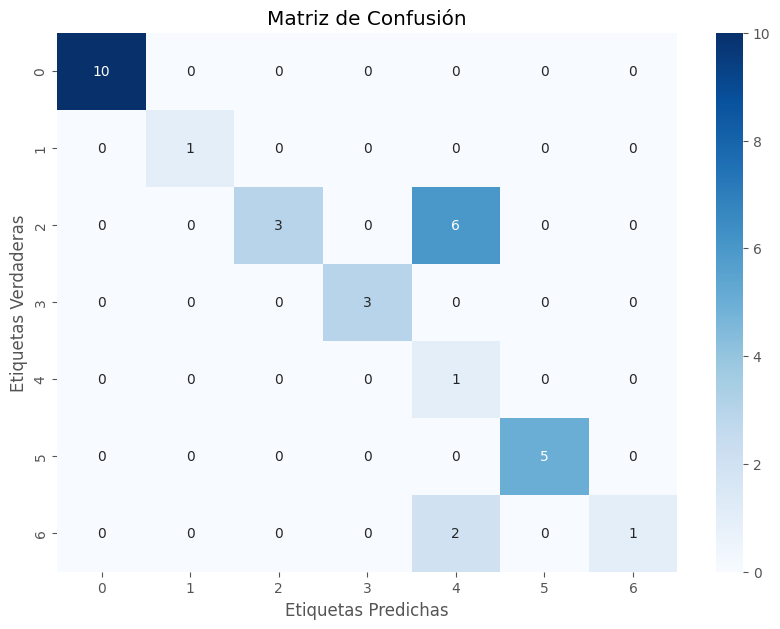

In [ ]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, clf.predict(X_test))

# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.ylabel('Etiquetas Verdaderas')
plt.xlabel('Etiquetas Predichas')
plt.show()



In [ ]:
cm = confusion_matrix(y_test, clf.predict(X_test))

# Imprimir la matriz de confusión
print(cm)

[[10  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0  3  0  6  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  2  0  1]]




##Estructura de la Matriz:##

* Filas (Etiquetas Verdaderas): Cada fila representa las instancias reales de una especie particular de pez en tu conjunto de datos de prueba.

* Columnas (Etiquetas Predichas): Cada columna representa las predicciones de tu modelo para una especie particular de pez.

Interpretación de la Matriz:

* Diagonal Principal (Correctas): Los valores en la diagonal principal indican el número de veces que el modelo predijo correctamente la especie de un pez. Por ejemplo, el modelo predijo correctamente la especie del primer tipo de pez 10 veces.
* Fuera de la Diagonal (Incorrectas): Los valores fuera de la diagonal principal indican errores en la clasificación. Por ejemplo, hay 6 instancias donde el modelo clasificó erróneamente peces de la tercera especie como de la quinta especie.

Análisis Específico:

* Especies Bien Clasificadas: Las especies correspondientes a las filas 1, 2, 4, 6 y 7 fueron generalmente bien clasificadas, con pocos o ningún error.
* Especies Mal Clasificadas: La especie en la fila 3 fue frecuentemente confundida con la especie de la columna 5, indicando una similitud significativa (según las características del modelo) entre estas dos especies, o una posible área de mejora en el modelo o en las características utilizadas para la clasificación.
* Errores Notables: Además del error mencionado entre las especies 3 y 5, también hay un error menor entre las especies 7 y 5, donde dos instancias de la especie 7 fueron clasificadas como de la especie 5.

Con la matriz de confusión podemos ver que el modelo tuvo problemas para predecir a la especia perca, falló con la especie pescado blanco y atinó todas las demás especies.

Sin embargo, hay que tener cuidado. Como se mencionó antes, nuestro dataset esta desbalanceado. Parece tener problemas para distinguir la especie prominente (un posible sub-ajuste). Al mismo tiempo, lo que parecen ser buenas predicciones puede ser una señala de sobre-ajuste. Por esto, veremos en futuros notebooks como atender esta situación.

# Visualización del Árbol

Dentro de la librería *Scikit Learn* podemos encontrar la función *plot_tree*, la cual nos permite visualizar como se tomaron las decisiones para clasificar dentro del árbol.

[Text(0.5961538461538461, 0.9642857142857143, 'x[4] <= 12.438\ngini = 0.778\nsamples = 127\nvalue = [25, 10, 47, 14, 19, 9, 3]'),
 Text(0.5192307692307693, 0.8928571428571429, 'x[3] <= 45.35\ngini = 0.733\nsamples = 102\nvalue = [2, 10, 45, 14, 19, 9, 3]'),
 Text(0.4807692307692308, 0.8214285714285714, 'x[4] <= 3.23\ngini = 0.699\nsamples = 93\nvalue = [2, 10, 45, 5, 19, 9, 3]'),
 Text(0.3076923076923077, 0.75, 'x[1] <= 8.75\ngini = 0.18\nsamples = 10\nvalue = [0, 0, 1, 0, 0, 9, 0]'),
 Text(0.2692307692307692, 0.6785714285714286, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0, 0]'),
 Text(0.34615384615384615, 0.6785714285714286, 'gini = 0.0\nsamples = 9\nvalue = [0, 0, 0, 0, 0, 9, 0]'),
 Text(0.6538461538461539, 0.75, 'x[2] <= 27.15\ngini = 0.647\nsamples = 83\nvalue = [2, 10, 44, 5, 19, 0, 3]'),
 Text(0.4230769230769231, 0.6785714285714286, 'x[4] <= 6.569\ngini = 0.663\nsamples = 52\nvalue = [2, 10, 22, 0, 18, 0, 0]'),
 Text(0.3076923076923077, 0.6071428571428571, 'x[4] <= 6.112\

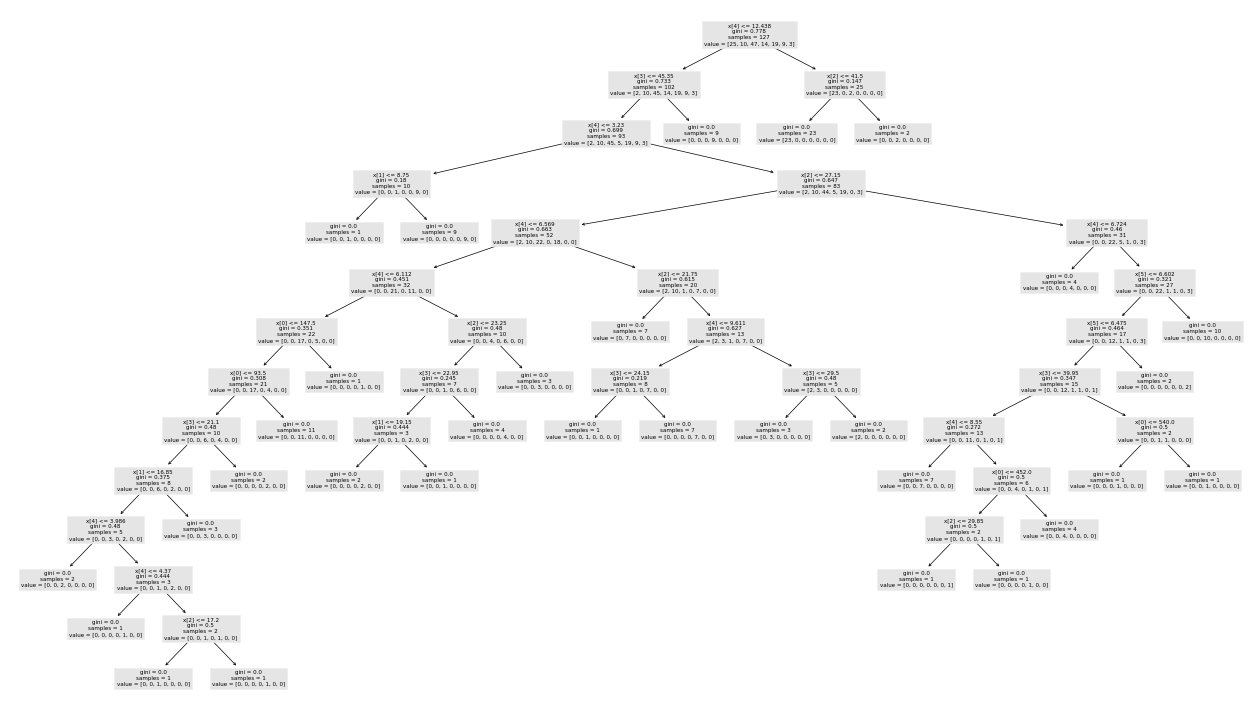

In [ ]:
tree.plot_tree(clf)

Otra forma de graficar

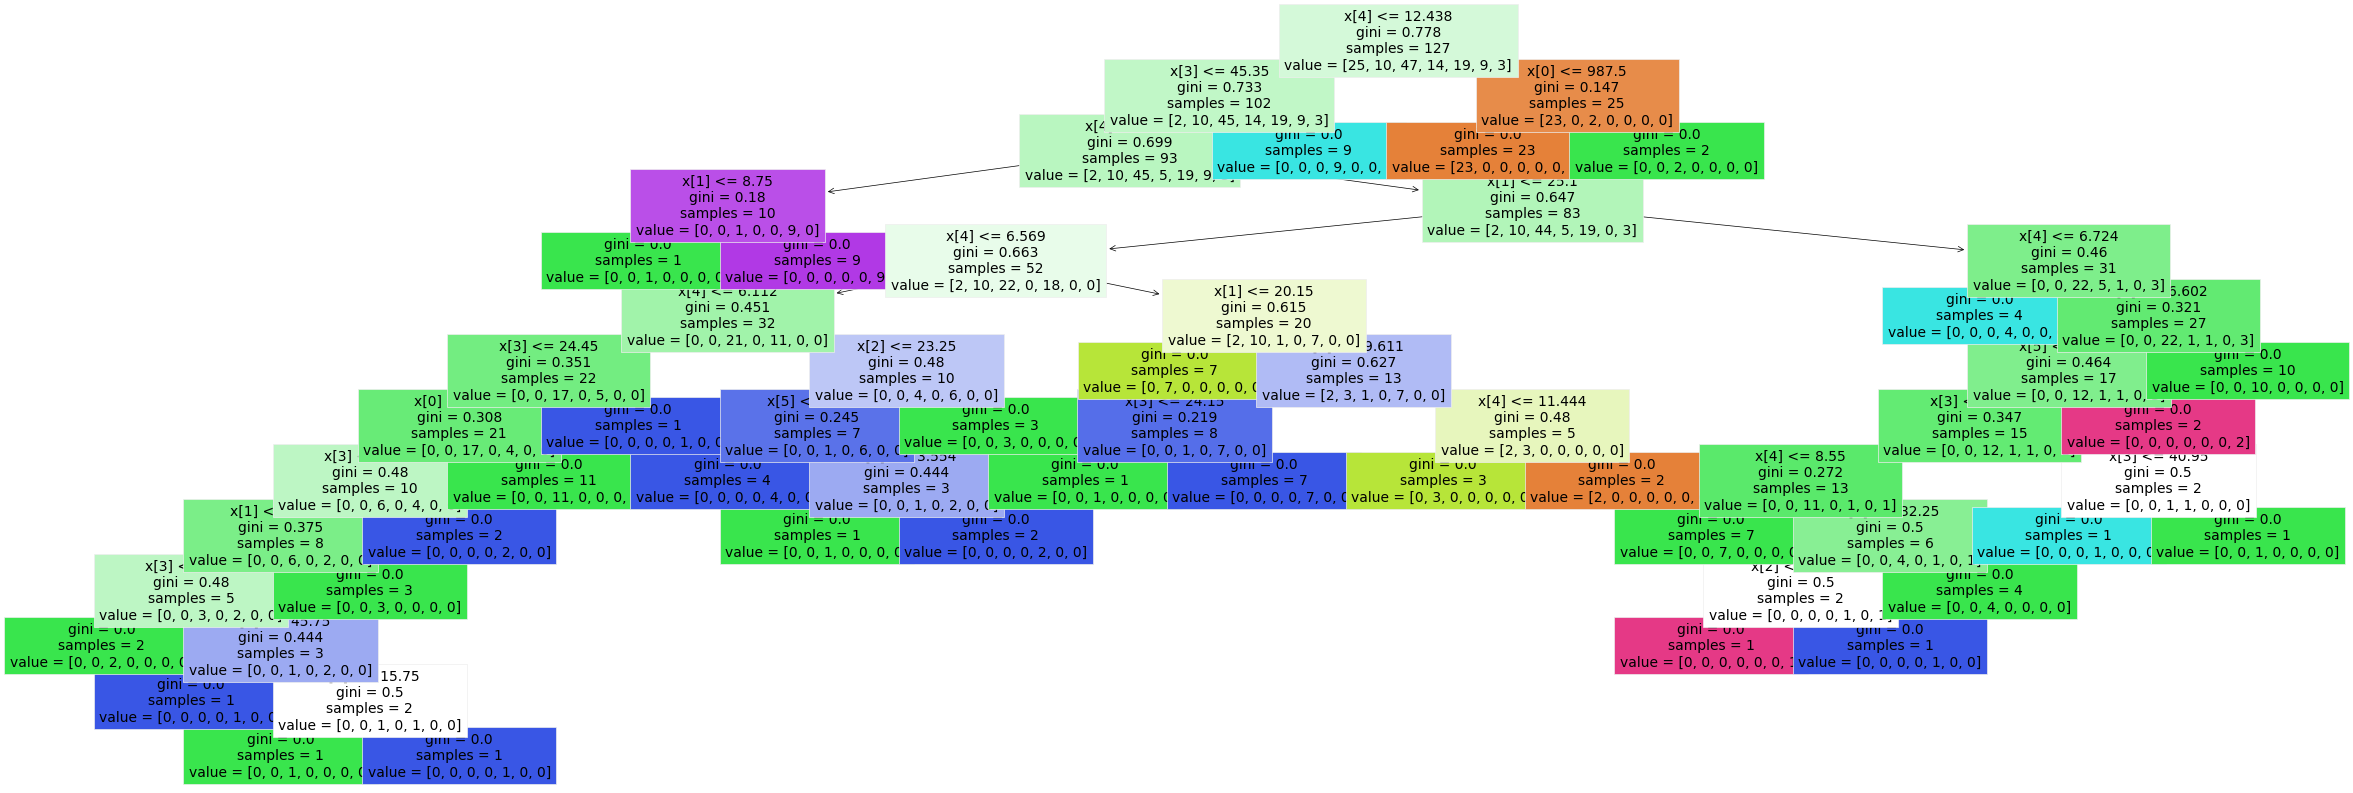

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(30,10))  # Ajusta el tamaño de la figura
plot_tree(clf, filled=True, fontsize=10)  # 'filled' colorea los nodos, 'fontsize' ajusta el tamaño de la fuente
plt.show()


Otra forma

In [ ]:
pip install graphviz


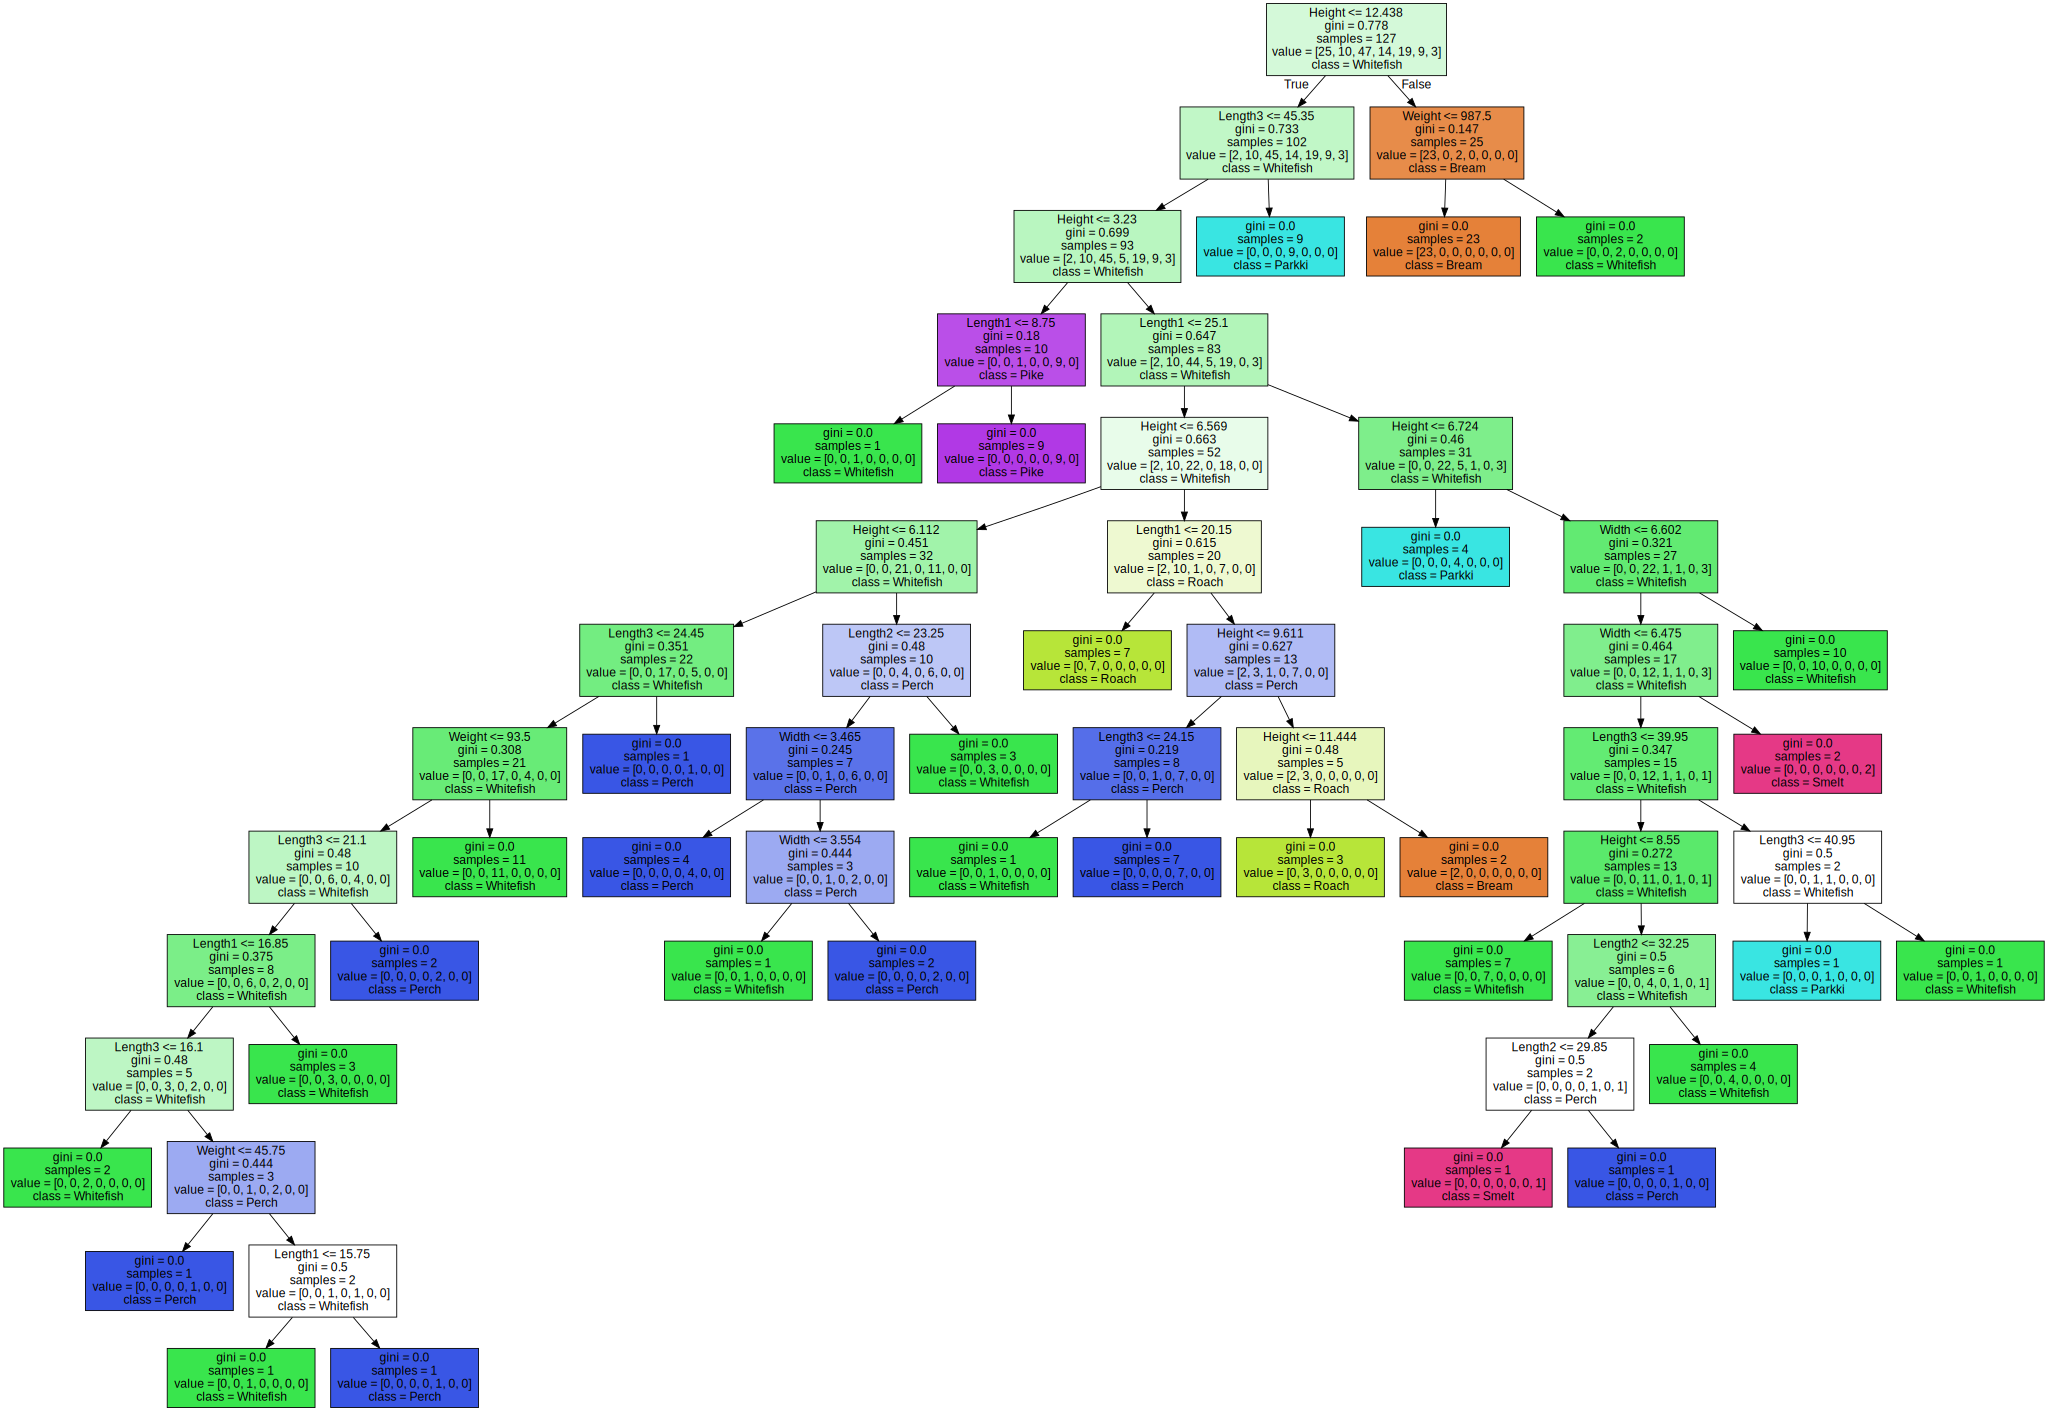

In [13]:
from sklearn.tree import export_graphviz
import graphviz

# Exportar el árbol en formato DOT
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=X.columns,  # Asegúrate de que 'X' es tu DataFrame de características
                           class_names=y.unique(),  # Asegúrate de que 'y' es tu Serie de etiquetas
                           filled=True)

# Dibujar el árbol
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Guarda el árbol en un archivo
graph  # Muestra el árbol


#Interpretación de un Árbol de Decisión #

Un árbol de decisión es básicamente una serie de preguntas o decisiones que se toman en base a los valores de las características de los datos. Cada nodo en el árbol representa una característica (o atributo), y cada división (o rama) representa una decisión que se toma en base a esa característica.

* Nodo Raíz: El nodo en la parte superior del árbol (donde comienza el árbol) es el nodo raíz. Representa la característica que proporciona la división más significativa entre las clases o valores objetivo.

* Nodos Internos: Cada nodo interno (los nodos debajo del nodo raíz) representa otra característica que ayuda a dividir los datos en grupos más homogéneos.

* Ramas: Las ramas que salen de un nodo representan las posibles respuestas a la pregunta o decisión planteada por ese nodo.

* Nodos Hoja: Los nodos en la parte inferior del árbol (donde terminan las ramas) son los nodos hoja. En un árbol de regresión, estos nodos representan el valor predicho para las observaciones que llegan a ese nodo.

#Cómo Leer el Árbol#

* Comienzas en el nodo raíz y te haces una pregunta basada en la característica que representa ese nodo.
* Dependiendo de la respuesta a esa pregunta, sigues la rama correspondiente hacia el siguiente nodo.
* Continúas este proceso hasta llegar a un nodo hoja, que te da la predicción final.


Es decir,

* Hipótesis (Condición en el Nodo): Es la pregunta o condición que se evalúa en ese nodo. Basándonos en si la condición es verdadera o falsa para una muestra dada, seguimos el camino hacia la izquierda (True) o la derecha (False).

* Valor Gini: Es una medida de impureza. Un Gini cercano a 0 indica que las muestras en ese nodo son mayormente de una sola clase, lo cual es ideal. Un Gini más alto indica una mayor mezcla de clases. En la práctica, buscamos nodos con valores de Gini bajos, ya que esto sugiere una mejor separación de las clases.

* Samples: Indica el número de muestras en ese nodo. No necesariamente buscas que este número sea grande o pequeño; más bien, te da una idea de cuántas muestras están siendo evaluadas en ese punto del árbol.

* Value: Muestra la distribución de las muestras entre las diferentes clases en ese nodo. Por ejemplo, "Value = [23, 0, 2, 0, 0, 0, 0]" indica que hay 23 muestras de una clase, 2 de otra, y ninguna en las clases restantes. Esto te ayuda a entender cómo se están dividiendo las muestras entre las diferentes clases en cada paso.

* Clase Predominante (Class): Es la clase que el nodo 'predice'. En un nodo hoja, es la clase final asignada a las muestras que llegan a ese nodo. En nodos no hoja, indica la clase más común entre las muestras en ese nodo hasta ese momento. Esto es especialmente útil en los nodos hoja, donde esta clase es el resultado de la clasificación.

#Ejemplo de Visualización#

Cuando visualizas un árbol con plot_tree, cada nodo mostrará:

* La condición o pregunta basada en la característica.
* El error o la medida de impureza del nodo (por ejemplo, MSE para regresión,gini).
* El número de muestras que llegaron a ese nodo.
* El valor promedio de la variable objetivo para esas muestras.

# Sobre la Complejidad y la Interpretación#

* Árboles Grandes y Complejos: Si el árbol es muy grande, puede ser difícil visualizarlo completamente en una sola pantalla. Puedes limitar la profundidad del árbol al entrenarlo para simplificar la visualización.
* Interpretación: La interpretación de un árbol grande puede ser compleja. En el contexto de un modelo de Bagging, recuerda que estás viendo solo uno de los muchos árboles, y cada árbol contribuye a la predicción final.

Si el árbol es demasiado grande para visualizarlo o interpretarlo fácilmente, podrías considerar limitar la profundidad del árbol al entrenar tu modelo de Bagging, o podrías explorar otros modelos que sean más interpretables.

Ruta en el Árbol de Decisión

Inicio en "Height <= 12.438"

* Gini = 0.778: Este valor indica la "impureza" del nodo. Un valor de Gini de 0 significa perfecta pureza (todas las muestras en el nodo pertenecen a una sola clase), mientras que valores más altos indican mayor mezcla de clases.
* Samples = 127: Número de muestras en este nodo.
* Value = [25, 10, 47, 14, 19, 9, 3]: Distribución de las muestras entre las clases.
* Class = Whitefish: La clase más común en este nodo.
* Decisión: Si "Height" es menor o igual a 12.438, vamos por el camino 'True', de lo contrario, por el camino 'False'.

Camino 'True' a "Length3 <= 45.35"

Se aplica lo mismo en términos de Gini, samples, value y class.
Decisión: Si "Length3" es menor o igual a 45.35, seguimos por 'True', de lo contrario, por 'False'.

Camino 'False' a "Weight <= 987.5"

Aquí, el Gini es mucho más bajo (0.147), lo que indica una mayor pureza. La mayoría de las muestras pertenecen a la clase "Bream".
Decisión: Si "Weight" es menor o igual a 987.5, vamos por 'True', de lo contrario por 'False'.

En el caso de 'True', nos dirigimos a "Height <= 3.23"

Aquí, hay dos posibles nodos finales (hojas). Si es 'True', seguimos a un nodo con Gini 0.699, y si es 'False', a un nodo con Gini 0.0 y clase "Parkki", lo que significa que todas las muestras en este nodo son de la clase "Parkki".
#Cómo Escoger#
Para decidir qué camino tomar, necesitas los valores de las características del pez que estás clasificando. Por ejemplo, si tienes un pez con una altura de 12.0, longitud3 de 46.0 y peso de 500.0, seguirías la ruta:

Comienzas en "Height <= 12.438" (True).
Luego vas a "Length3 <= 45.35" (False, porque 46.0 no es menor o igual a 45.35).
Y finalmente, "Weight <= 987.5" (True).
En cada paso, eliges el camino en base a si la condición es verdadera o falsa para las medidas de tu pez.

#El Valor Gini#
El coeficiente de Gini es una medida de impureza o diversidad utilizada en el algoritmo del árbol de decisión. Un valor Gini bajo indica que un nodo contiene principalmente ejemplos de una sola clase, mientras que un valor más alto indica una mezcla de clases. Es útil para entender qué tan "bien" un nodo está separando las clases. En el contexto de un árbol de decisión, un nodo con Gini de 0 es perfecto, ya que todas sus muestras pertenecen a una sola clase.